In [ ]:
# Name = Ashutosh Sharma 
# RegID = 12409632
# Section = RD2445A05

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("StudentPerformanceFactor.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,21,79,Medium,High,Yes,7,66,Low,Yes,2,Low,Medium,Public,Negative,4,No,College,Moderate,Male,67
195,22,79,High,Medium,No,5,100,Medium,Yes,4,High,High,Public,Negative,3,No,College,Near,Male,72
196,15,95,Low,Low,Yes,6,88,Low,Yes,1,Low,Medium,Public,Negative,5,No,High School,Near,Male,66
197,21,91,Medium,High,Yes,5,84,Medium,Yes,1,High,Low,Public,Neutral,2,No,High School,Near,Male,70


In [3]:
data.head()  

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               199 non-null    int64 
 1   Attendance                  199 non-null    int64 
 2   Parental_Involvement        199 non-null    object
 3   Access_to_Resources         199 non-null    object
 4   Extracurricular_Activities  199 non-null    object
 5   Sleep_Hours                 199 non-null    int64 
 6   Previous_Scores             199 non-null    int64 
 7   Motivation_Level            199 non-null    object
 8   Internet_Access             199 non-null    object
 9   Tutoring_Sessions           199 non-null    int64 
 10  Family_Income               199 non-null    object
 11  Teacher_Quality             198 non-null    object
 12  School_Type                 199 non-null    object
 13  Peer_Influence              199 non-null    object

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,19.819095,80.170854,6.859296,76.467337,1.497487,3.040201,67.336683
std,5.556636,11.619861,1.403567,14.733583,1.154151,1.038838,3.918644
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,60.000000
25%,16.000000,70.000000,6.000000,65.000000,1.000000,2.000000,65.000000
50%,20.000000,79.000000,7.000000,78.000000,1.000000,3.000000,67.000000
75%,23.000000,91.000000,8.000000,89.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,5.000000,6.000000,100.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               1
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            1
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
data['Teacher_Quality'].fillna(0,inplace = True)
data

C:\Users\ASHUTOSH SHARMA\AppData\Local\Temp\ipykernel_19020\1301136774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Teacher_Quality'].fillna(0,inplace = True)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,21,79,Medium,High,Yes,7,66,Low,Yes,2,Low,Medium,Public,Negative,4,No,College,Moderate,Male,67
195,22,79,High,Medium,No,5,100,Medium,Yes,4,High,High,Public,Negative,3,No,College,Near,Male,72
196,15,95,Low,Low,Yes,6,88,Low,Yes,1,Low,Medium,Public,Negative,5,No,High School,Near,Male,66
197,21,91,Medium,High,Yes,5,84,Medium,Yes,1,High,Low,Public,Neutral,2,No,High School,Near,Male,70


In [9]:
data['Distance_from_Home'].fillna(0,inplace = True)
data

C:\Users\ASHUTOSH SHARMA\AppData\Local\Temp\ipykernel_19020\715270329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Distance_from_Home'].fillna(0,inplace = True)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,21,79,Medium,High,Yes,7,66,Low,Yes,2,Low,Medium,Public,Negative,4,No,College,Moderate,Male,67
195,22,79,High,Medium,No,5,100,Medium,Yes,4,High,High,Public,Negative,3,No,College,Near,Male,72
196,15,95,Low,Low,Yes,6,88,Low,Yes,1,Low,Medium,Public,Negative,5,No,High School,Near,Male,66
197,21,91,Medium,High,Yes,5,84,Medium,Yes,1,High,Low,Public,Neutral,2,No,High School,Near,Male,70


In [10]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [11]:
for i in data.select_dtypes(include='number'):
    print(i, "=====", data[i].unique())

Hours_Studied ===== [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36]
Attendance ===== [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Sleep_Hours ===== [ 7  8  6 10  9  5  4]
Previous_Scores ===== [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53]
Tutoring_Sessions ===== [0 2 1 3 4 5]
Physical_Activity ===== [3 4 2 1 5 0 6]
Exam_Score ===== [ 67  61  74  71  70  66  69  72  68  65  64  60  63  62 100  76  79  73]


In [12]:
num_col = data.select_dtypes(include ='number')
num_col.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.056307,-0.040839,-0.046032,-0.003221,-0.101101,0.343772
Attendance,-0.056307,1.000000,-0.062311,-0.032535,-0.026329,-0.043248,0.586590
Sleep_Hours,-0.040839,-0.062311,1.000000,-0.010725,-0.112458,0.031609,-0.140102
Previous_Scores,-0.046032,-0.032535,-0.010725,1.000000,-0.061856,-0.005193,0.131275
Tutoring_Sessions,-0.003221,-0.026329,-0.112458,-0.061856,1.000000,-0.029402,0.190585
Physical_Activity,-0.101101,-0.043248,0.031609,-0.005193,-0.029402,1.000000,-0.062893
Exam_Score,0.343772,0.586590,-0.140102,0.131275,0.190585,-0.062893,1.000000


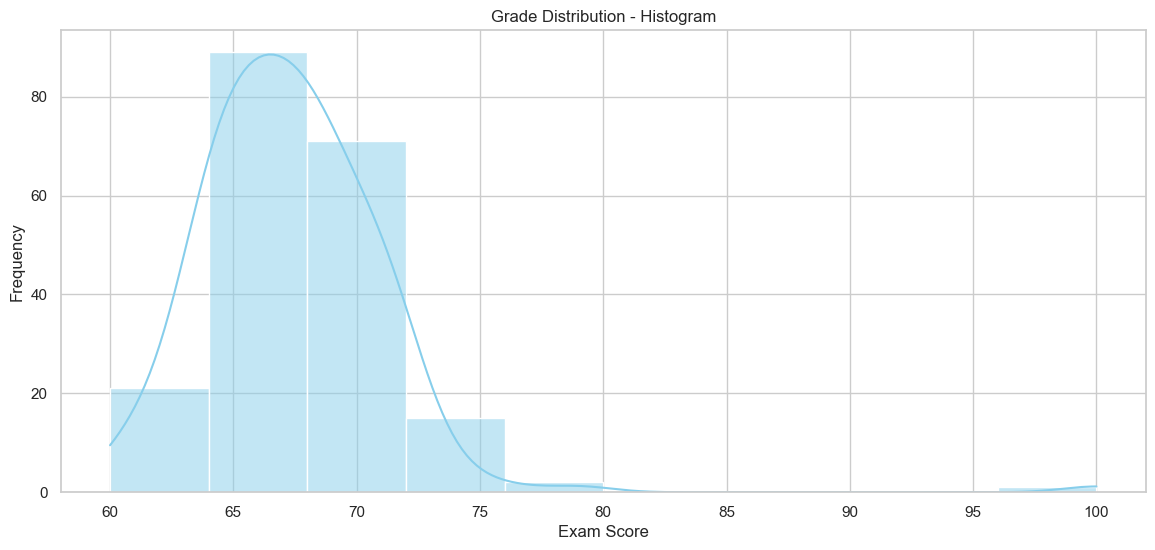

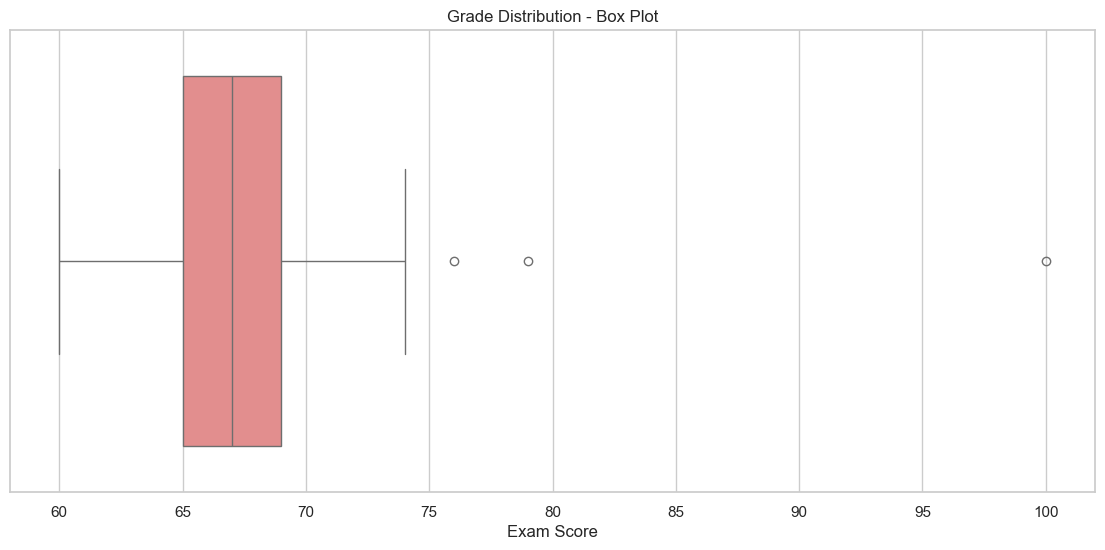

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.histplot(data['Exam_Score'], bins=10, kde=True, color="skyblue")
plt.title('Grade Distribution - Histogram')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x=data['Exam_Score'], color="lightcoral")
plt.title('Grade Distribution - Box Plot')
plt.xlabel('Exam Score')
plt.show()

C:\Users\ASHUTOSH SHARMA\AppData\Local\Temp\ipykernel_19020\300277467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Exam_Score', data=data, palette="viridis", errorbar=None)


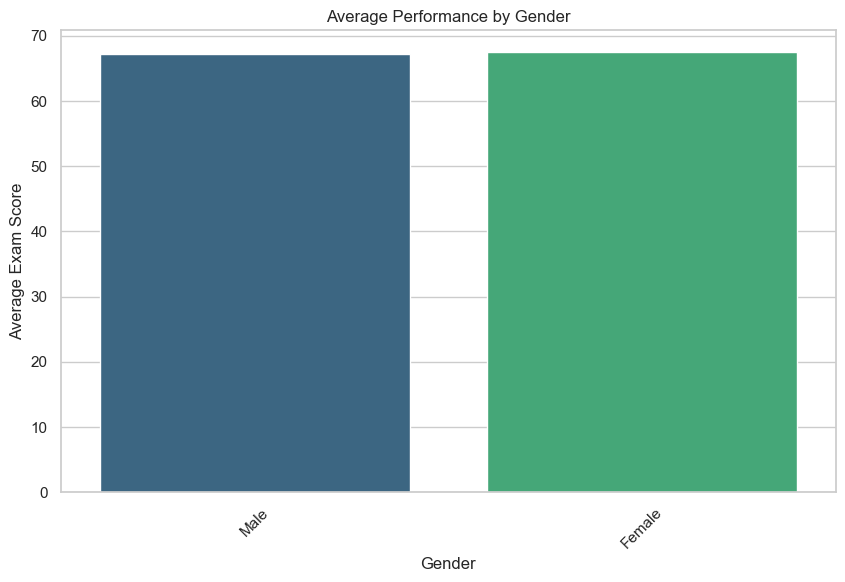

C:\Users\ASHUTOSH SHARMA\AppData\Local\Temp\ipykernel_19020\300277467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Exam_Score', data=filtered_data, palette="viridis", errorbar=None)


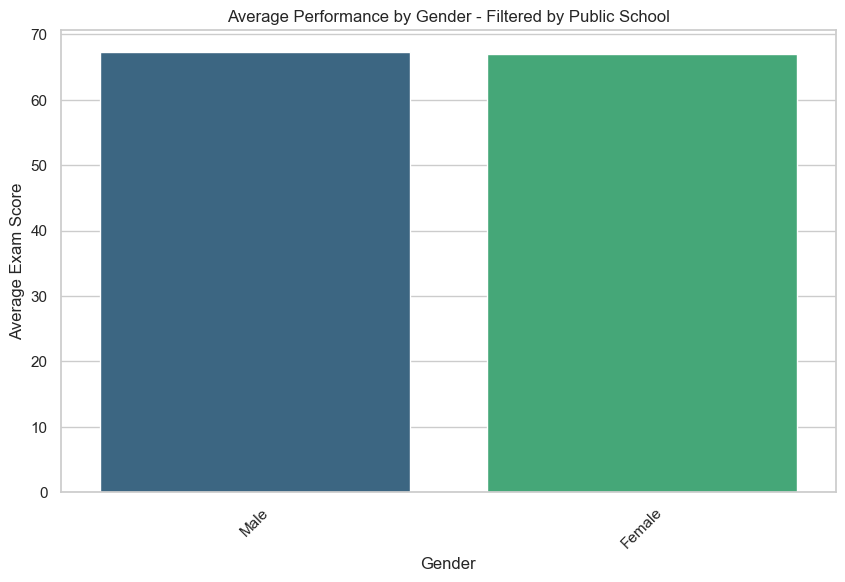

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Exam_Score', data=data, palette="viridis", errorbar=None)
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)
plt.show()


filtered_data = data[data['School_Type'] == 'Public']
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Exam_Score', data=filtered_data, palette="viridis", errorbar=None)
plt.title('Average Performance by Gender - Filtered by Public School')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)
plt.show()

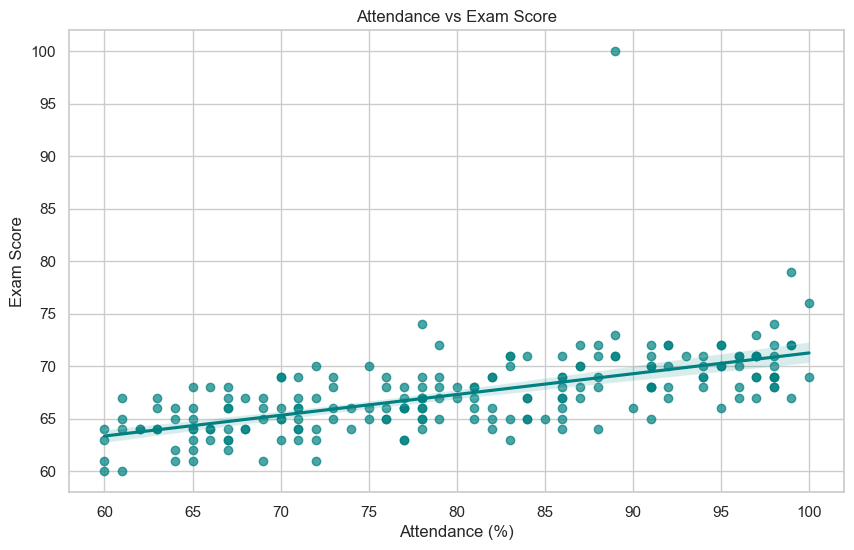

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Attendance', y='Exam_Score', data= data, color="teal", scatter_kws={'alpha':0.7})
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.show()

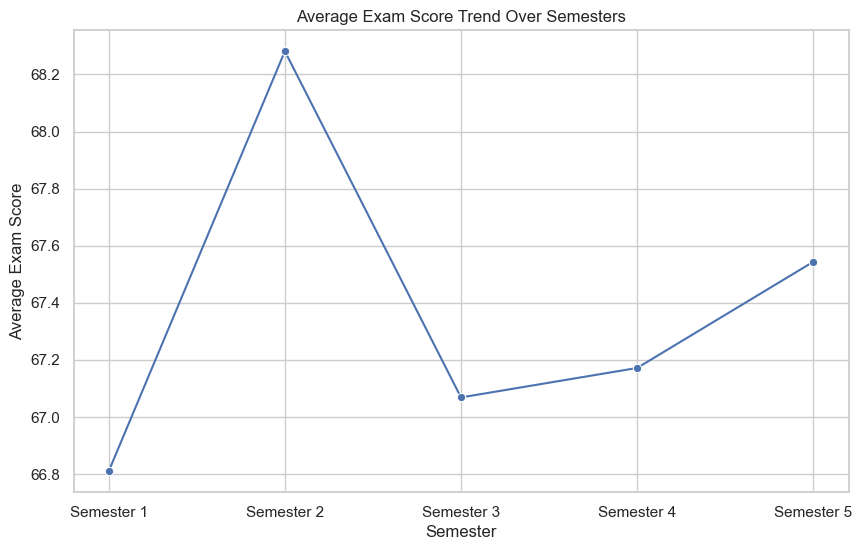

In [28]:
data['Semester'] = np.random.randint(1, 6, data.shape[0])
plt.figure(figsize=(10, 6))
sns.lineplot(x='Semester', y='Exam_Score', data=data, marker="o", errorbar=None)
plt.title('Average Exam Score Trend Over Semesters')
plt.xlabel('Semester')
plt.ylabel('Average Exam Score')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['Semester 1', 'Semester 2', 'Semester 3', 'Semester 4', 'Semester 5'])
plt.show()

In [17]:
data['At_Risk'] = (data['Exam_Score'] < 60).astype(int)

In [18]:
features = ['Attendance', 'Previous_Scores', 'Hours_Studied']
X = data[features]
y = data['At_Risk']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Random Forest - Accuracy Score: 1.0
Random Forest - Confusion Matrix:
 [[60]]


C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


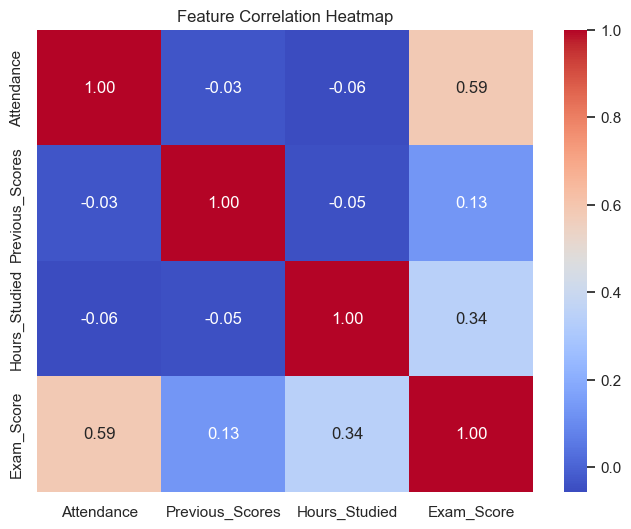

In [23]:

correlation_matrix = data[['Attendance', 'Previous_Scores', 'Hours_Studied', 'Exam_Score']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


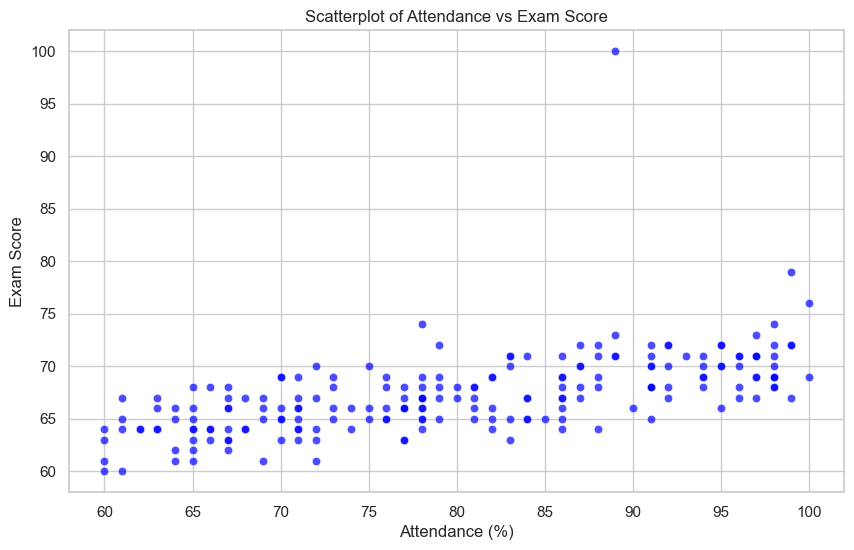

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=data, color="blue", alpha=0.7)
plt.title('Scatterplot of Attendance vs Exam Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.show()

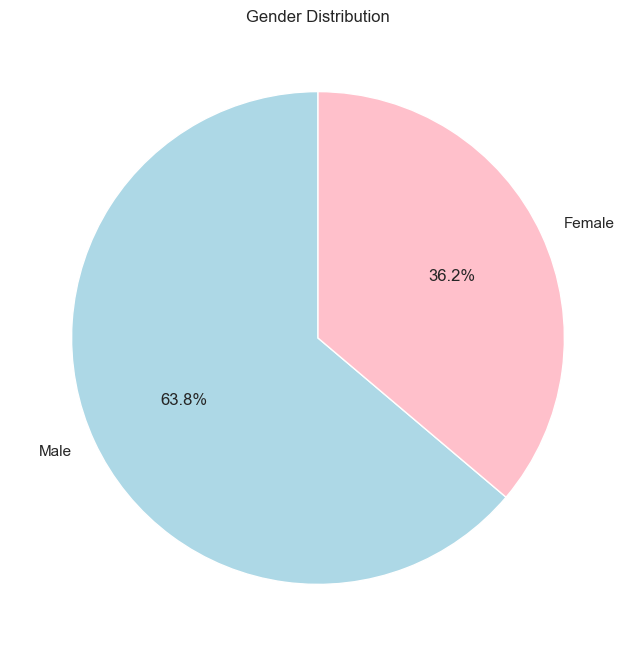

In [25]:

gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "pink"])
plt.title('Gender Distribution')
plt.show()


C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\ASHUTOSH SHARMA\anaconda3\Lib\site-packages\seaborn\axis

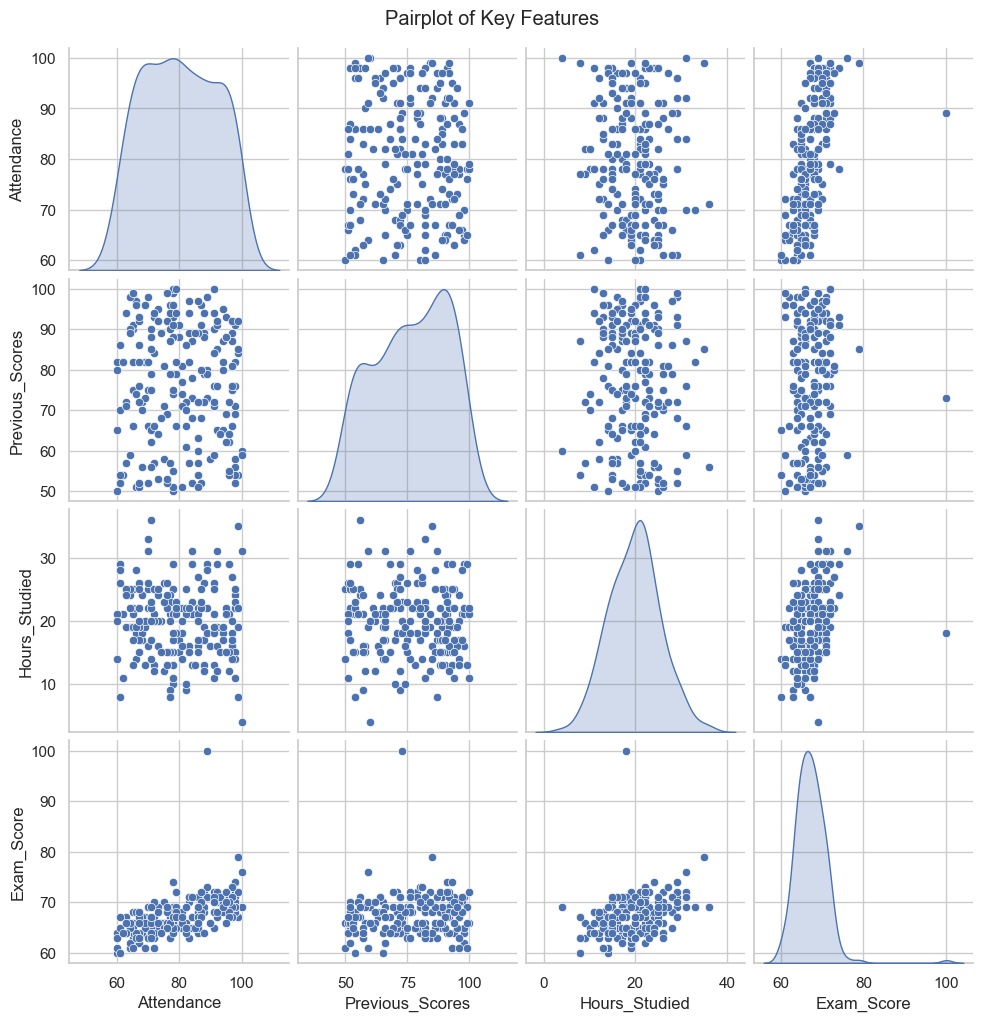

In [26]:
sns.pairplot(data[['Attendance', 'Previous_Scores', 'Hours_Studied', 'Exam_Score']], diag_kind='kde', kind='scatter', palette="coolwarm")
plt.suptitle('Pairplot of Key Features', y=1.02)  
plt.show()


C:\Users\ASHUTOSH SHARMA\AppData\Local\Temp\ipykernel_19020\346760998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Exam_Score', data=data, palette="viridis", inner="quartile")


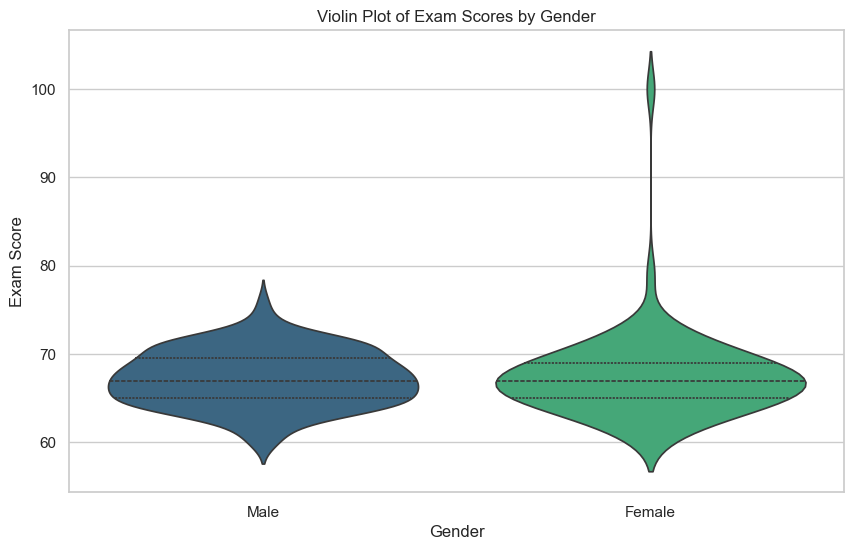

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Exam_Score', data=data, palette="viridis", inner="quartile")
plt.title('Violin Plot of Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()
